## Our Mission ##

SMS Spam Detection with Naive Bayes
Spam detection is a vital Machine Learning application used by email service providers to classify unwanted messages as 'Junk Mail.' This project utilizes the Naive Bayes algorithm to create a model that categorizes SMS messages as spam or not spam.

Key Characteristics of Spam Messages:
Spam texts often include attention-grabbing words like 'free,' 'win,' and 'cash,' and may use uppercase letters and excessive punctuation, making them easily identifiable.

Classification Overview:
This task is a binary classification problem where messages are labeled as either 'Spam' or 'Not Spam.' As a supervised learning project, the model learns from a labeled dataset to make predictions on new, unseen messages.

### Step 1.1: Understanding our dataset ### 


We will be using a dataset originally compiled and posted on the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. If you're interested, you can review the [abstract](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) and the original [compressed data file](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/) on the UCI site. For this exercise, however, we've gone ahead and downloaded the data for you.

In [284]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [285]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Step 1.2: Data Preprocessing ###

### Drop Unwanted Columns

In [286]:
#Drop unwanted Columns

drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = data.drop(drop, axis=1)

#### Rename Column Names

In [287]:
df.rename(columns={'v1': 'Label', 'v2': 'Message'}, inplace=True)

df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [288]:
df.shape

(5572, 2)

In [289]:
#Check for Duplicate values
df.duplicated().sum()

403

In [290]:
clean_data = df.drop_duplicates()
clean_data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [291]:
clean_data.duplicated().sum()


0

### Convert Categorical Label into Numerical

In [292]:
# We Replace ham with 0 and spam with 1
#clean_data.loc[:, 'Label'] = clean_data['Label'].map({'ham': 0, 'spam': 1})


In [293]:
clean_data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [294]:
clean_data.tail(10)

,Label,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [295]:
# Count the Number of Spam and number of Ham
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

### Display Most Frequently Used Words found in the spam messages

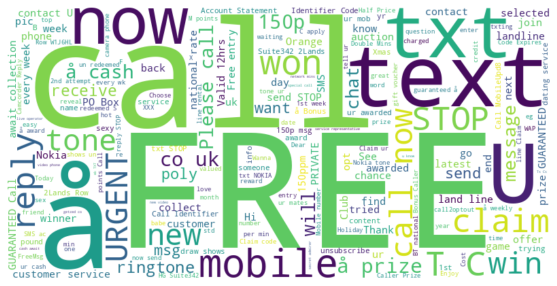

In [296]:
# Import necessary libraries

# Filter spam messages
spam_messages = df[df['Label'] == 'spam']['Message']

# Combine all spam messages into one text
spam_text = ' '.join(spam_messages)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [297]:
spam_messages

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object

## Step 2.1: Bag of Words(BoW)


### Step 2.2: Implementing Bag of Words from scratch ###

Before we dive into scikit-learn's Bag of Words(BoW) library to do the dirty work for us, let's implement it ourselves first so that we can understand what's happening behind the scenes. 

**Step 1: Convert all strings to their lower case form.**

Let's say we have a document set:

```
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
```
>>**Instructions:**
* Convert all the strings in the documents set to their lower case. Save them into a list called 'lower_case_documents'. You can convert strings to their lower case in python by using the lower() method.


In [298]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())

# Print each string on a new line
for doc in lower_case_documents:
    print(doc)

hello, how are you!
win money, win from home.
call me now.
hello, call hello you tomorrow?


**Step 2: Removing all punctuation**

>>**Instructions:**
Remove all punctuation from the strings in the document set. Save them into a list called 
'sans_punctuation_documents'. 

In [299]:
import string

sans_punctuation_documents = []
for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))

# Print each document without punctuation
for doc in sans_punctuation_documents:
    print(doc)

hello how are you
win money win from home
call me now
hello call hello you tomorrow


**Step 3: Tokenization**

Tokenizing a sentence in a document set means splitting up a sentence into individual words using a delimiter. The delimiter specifies what character we will use to identify the beginning and the end of a word(for example we could use a single space as the delimiter for identifying words in our document set.)

>>**Instructions:**
Tokenize the strings stored in 'sans_punctuation_documents' using the split() method. Store the final document set 
in a list called 'preprocessed_documents'.


In [300]:
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))

# Print each document without punctuation
for doc in preprocessed_documents:
    print(doc)

['hello', 'how', 'are', 'you']
['win', 'money', 'win', 'from', 'home']
['call', 'me', 'now']
['hello', 'call', 'hello', 'you', 'tomorrow']


**Step 4: Count frequencies**

Now that we have our document set in the required format, we can proceed to counting the occurrence of each word in each document of the document set. We will use the `Counter` method from the Python `collections` library for this purpose. 

`Counter` counts the occurrence of each item in the list and returns a dictionary with the key as the item being counted and the corresponding value being the count of that item in the list. 

>>**Instructions:**
Using the Counter() method and preprocessed_documents as the input, create a dictionary with the keys being each word in each document and the corresponding values being the frequncy of occurrence of that word. Save each Counter dictionary as an item in a list called 'frequency_list'.


In [301]:
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


### Step 2.3: Implementing Bag of Words in scikit-learn ###

Now that we have implemented the BoW concept from scratch, let's go ahead and use scikit-learn to do this process in a clean and succinct way. We will use the same document set as we used in the previous step.

In [302]:
documents

['Hello, how are you!',
 'Win money, win from home.',
 'Call me now.',
 'Hello, Call hello you tomorrow?']

>>**Instructions:**
Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'. 

In [303]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector

CountVectorizer()

>>**Instructions:**
Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words 
which have been categorized as features using the get_feature_names() method.

In [304]:
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

>>**Instructions:**
Create a matrix with the rows being each of the 4 documents, and the columns being each word. 
The corresponding (row, column) value is the frequency of occurrance of that word(in the column) in a particular
document(in the row). You can do this using the transform() method and passing in the document data set as the 
argument. The transform() method returns a matrix of numpy integers, you can convert this to an array using
toarray(). Call the array 'doc_array'


In [305]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

>>**Instructions:**
Convert the array we obtained, loaded into 'doc_array', into a dataframe and set the column names to 
the word names(which you computed earlier using get_feature_names(). Call the dataframe 'frequency_matrix'.


In [306]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [307]:
documents

['Hello, how are you!',
 'Win money, win from home.',
 'Call me now.',
 'Hello, Call hello you tomorrow?']

### Step 3.1: Training and testing sets ###

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later. 


>>**Instructions:**
Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data
using the following variables:
* `X_train` is our training data for the 'sms_message' column.
* `y_train` is our training data for the 'label' column
* `X_test` is our testing data for the 'sms_message' column.
* `y_test` is our testing data for the 'label' column
Print out the number of rows we have in each our training and testing data.


In [308]:
# split into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data['Message'], 
                                                    clean_data['Label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 3876
Number of rows in the test set: 1293


In [309]:
X_train.head(10)

1                           Ok lar... Joking wif u oni...
5362    I'm in inside office..still filling forms.don ...
3468    All day working day:)except saturday and sunday..
2865                        Smith waste da.i wanna gayle.
3781                     How r Ì_ going to send it to me?
4541    FreeMsg Hi baby wow just got a new cam moby. W...
213                              Yup... How Ì_ noe leh...
682                                Is xy going 4 e lunch?
4593    I had a good time too. Its nice to do somethin...
5321    Ok no problem... Yup i'm going to sch at 4 if ...
Name: Message, dtype: object

In [310]:
y_train.head(10)

1        ham
5362     ham
3468     ham
2865     ham
3781     ham
4541    spam
213      ham
682      ham
4593     ham
5321     ham
Name: Label, dtype: object

### Step 3.2: Applying Bag of Words processing to our dataset. ###
To do this we will be using CountVectorizer() as we did before. There are two  steps to consider here:

* Firstly, we have to fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.
* Secondly, we have to transform our testing data (`X_test`) to return the matrix.

In [311]:
'''
Solution
'''
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [312]:
r = pd.DataFrame(training_data.toarray())
r.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372
3866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4.1: Naive Bayes implementation using scikit-learn ###

In layman's terms, the Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event in question. It is  composed of a  prior(the probabilities that we are aware of or that is given to us) and the posterior(the probabilities we are looking to compute using the priors). 

Thankfully, sklearn has several Naive Bayes implementations that we can use and so we do not have to do the math from scratch. We will be using sklearns `sklearn.naive_bayes` method to make predictions on our dataset. 

Specifically, we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.


In [313]:
'''
Solution
'''
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

In [314]:

predictions = naive_bayes.predict(testing_data)

print(np.array(y_test[:11]),'Exact')
print(predictions[:11],'Predicted')

['ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'] Exact
['ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'] Predicted


### Step 6: Evaluating our model ###

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, so first let's review them.

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all positives (all words classified as spam, regardless of whether that was the correct classification). In other words, precision is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all the words that were actually spam. In other words, recall is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case - for example if we had 100 text messages and only 2 were spam and the other 98 weren't - accuracy by itself is not a very good metric. We could classify 90 messages as not spam (including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the **F1 score**, which is the weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

In [315]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))


Accuracy score:  0.979891724671307


## Predict with our own message ##

In [321]:
# Test Ham
message1 = ['Hi, Welcome to Fordham_Cybersecurity_Club']
ham_count = count_vector.transform(message1)
predict = naive_bayes.predict(ham_count)

# Get class probabilities
probabilities = naive_bayes.predict_proba(ham_count)

# Print the predicted probabilities
for i, message in enumerate(message1):
    print(f"Message: {message1[i]} | Probabilities: {probabilities[i]} | Predicted class: {predict[i]}")

Message: Hi, Welcome to Fordham_Cybersecurity_Club | Probabilities: [0.79263207 0.20736793] | Predicted class: ham


In [317]:
message2 = ['Hey there, click on the link to claim your prize']
spam_count = count_vector.transform(message2)
predict = naive_bayes.predict(spam_count)

# Get class probabilities
probabilities = naive_bayes.predict_proba(spam_count)

# Print the predicted probabilities
for i, message in enumerate(message2):
    print(f"Message: {message2[i]} | Probabilities: {probabilities[i]} | Predicted class: {predict[i]}")

Message: Hey there, click on the link to claim your prize | Probabilities: [9.97251695e-05 9.99900275e-01] | Predicted class: spam


In [318]:
message3 = ['Urgent, please call this number to redeem your reward']
spam_count = count_vector.transform(message3)
predict = naive_bayes.predict(spam_count)

# Get class probabilities
probabilities = naive_bayes.predict_proba(spam_count)

# Print the predicted probabilities
for i, message in enumerate(message3):
    print(f"Message: {message3[i]} | Probabilities: {probabilities[i]} | Predicted class: {predict[i]}")

Message: Urgent, please call this number to redeem your reward | Probabilities: [5.16115268e-04 9.99483885e-01] | Predicted class: spam


In [319]:
message4 = ['Urgent, lets meet at the mall at 10 oclock sharp ']
ham_count = count_vector.transform(message4)
predict = naive_bayes.predict(ham_count)

# Get class probabilities
probabilities = naive_bayes.predict_proba(ham_count)

# Print the predicted probabilities
for i, message in enumerate(message4):
    print(f"Message: {ham_email[i]} | Probabilities: {probabilities[i]} | Predicted class: {predict[i]}")

Message: Urgent, lets meet at the mall at 10 oclock sharp  | Probabilities: [0.99308924 0.00691076] | Predicted class: ham
